In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_twitter_Klout.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

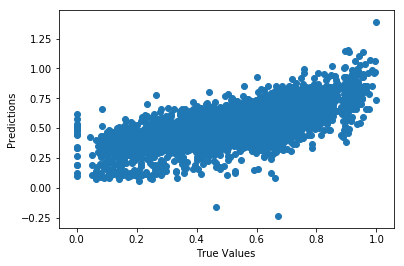

[  6.42573623e-05   3.14526505e-05  -1.53664572e-01   6.97136651e-01
  -4.05588528e+00  -1.12491633e+00   5.46552442e+01  -4.04217121e-04
  -3.64668048e-05  -3.82446840e-04  -6.26007400e-05  -9.69900811e-02
  -2.18976982e-02   4.54229345e-02   2.88653143e-01   9.91082943e+00
   6.35667253e-01  -1.12377786e-01   4.00873774e-02  -3.04705661e+01
   2.71141990e+01  -1.04831579e-05   6.32629742e-06  -2.68382227e-04
  -1.66004168e-04   2.59207327e-01  -1.48521218e-01   3.44452938e-01
   2.48784041e-03  -1.86255920e+01   3.19267879e+00   1.29887575e-01
  -1.18057368e+00   3.47051591e+02  -9.64759499e+01  -2.34478058e-07
   9.77968850e-03   1.15628742e-04   1.44324518e-03   8.53004792e-06
   2.38714571e-05   6.29064881e-07  -9.67312780e-06]


In [5]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print(lm.coef_)

In [6]:
scores = cross_val_score(model, df, y, cv=4)
print("Cross-validated scores:", scores)

Cross-validated scores: [  0.40068308 -18.27081435   0.45109767   0.34785422]


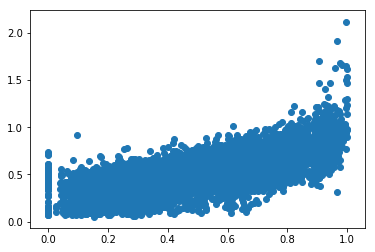

In [7]:
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)
plt.show()

In [8]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.518743145119


In [9]:
print(lm.coef_)

[  6.42573623e-05   3.14526505e-05  -1.53664572e-01   6.97136651e-01
  -4.05588528e+00  -1.12491633e+00   5.46552442e+01  -4.04217121e-04
  -3.64668048e-05  -3.82446840e-04  -6.26007400e-05  -9.69900811e-02
  -2.18976982e-02   4.54229345e-02   2.88653143e-01   9.91082943e+00
   6.35667253e-01  -1.12377786e-01   4.00873774e-02  -3.04705661e+01
   2.71141990e+01  -1.04831579e-05   6.32629742e-06  -2.68382227e-04
  -1.66004168e-04   2.59207327e-01  -1.48521218e-01   3.44452938e-01
   2.48784041e-03  -1.86255920e+01   3.19267879e+00   1.29887575e-01
  -1.18057368e+00   3.47051591e+02  -9.64759499e+01  -2.34478058e-07
   9.77968850e-03   1.15628742e-04   1.44324518e-03   8.53004792e-06
   2.38714571e-05   6.29064881e-07  -9.67312780e-06]
